1. Data Collection (Web Scraping)

In [2]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# Create empty lists to store the user data
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the URL of the Flipkart website and use Selenium to scrape data
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"

driver = webdriver.Chrome()
driver.get(url)

while len(Names) < 130:
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    # Extract names
    names_elements = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in names_elements:
        Names.append(name.text)
    
    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"})
    for city in city_elements:
        Cities.append(city.text)
    
    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"})
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]  # Fix the length of Dates
    
    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)
    
    # Extract ratings
    ratings_elements = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
    for rating in ratings_elements:
        Ratings.append(rating.text)
    
    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

# Combine data into a DataFrame
df = pd.DataFrame({
    "Name": Names,
    "City": Cities,
    "Date": Actual_Dates[:len(Names)],  # Align Dates length with Names
    "Review": Reviews,
    "Ratings": Ratings
})

# Save to CSV
df.to_csv('flipkart_reviews.csv', index=False)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     133 non-null    object
 1   City     133 non-null    object
 2   Date     133 non-null    object
 3   Review   133 non-null    object
 4   Ratings  133 non-null    object
dtypes: object(5)
memory usage: 5.3+ KB


2. Data Cleaning and Preprocessing

In [31]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,bijaya mohanty,"Certified Buyer, Baleshwar",8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
128,Raghava Karthik,"Certified Buyer, Hyderabad",11 months ago,Beautiful camera and also updated features for...,5
129,Avinandan Mondal,"Certified Buyer, Fatehpur",4 months ago,been using the iPhone 15 model for a few month...,5
130,Shrikant Panigrahi,"Certified Buyer, Mumbai","Feb, 2024",Black one is classy. Photos are much better th...,5
131,Ashis Karamakar,"Certified Buyer, Chittoor District","Feb, 2024",Excellent productREAD MORE,5


In [32]:
# Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,"Certified Buyer, Baleshwar",8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [33]:
# Clean data of City column by removing unwanted characters/ part of string
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,Baleshwar,8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [34]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase

df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5


In [35]:
df1

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
...,...,...,...,...,...
128,Raghava Karthik,Hyderabad,11 months ago,beautiful camera and also updated features for...,5
129,Avinandan Mondal,Fatehpur,4 months ago,been using the iphone 15 model for a few month...,5
130,Shrikant Panigrahi,Mumbai,"Feb, 2024",black one is classy. photos are much better th...,5
131,Ashis Karamakar,Chittoor District,"Feb, 2024",excellent product,5


In [37]:
df1

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
...,...,...,...,...,...
128,Raghava Karthik,Hyderabad,11 months ago,beautiful camera and also updated features for...,5
129,Avinandan Mondal,Fatehpur,4 months ago,been using the iphone 15 model for a few month...,5
130,Shrikant Panigrahi,Mumbai,"Feb, 2024",black one is classy. photos are much better th...,5
131,Ashis Karamakar,Chittoor District,"Feb, 2024",excellent product,5


3. Sentiment Analysis

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

In [39]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1

,Name,City,Date,Review,Ratings,Reviews_t
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
...,...,...,...,...,...,...
128,Raghava Karthik,Hyderabad,11 months ago,beautiful camera and also updated features for...,5,[beautiful camera and also updated features fo...
129,Avinandan Mondal,Fatehpur,4 months ago,been using the iphone 15 model for a few month...,5,[been using the iphone 15 model for a few mont...
130,Shrikant Panigrahi,Mumbai,"Feb, 2024",black one is classy. photos are much better th...,5,"[black one is classy., photos are much better ..."
131,Ashis Karamakar,Chittoor District,"Feb, 2024",excellent product,5,[excellent product]


In [40]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences): 
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]
    
# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities): 
    return mean(polarities) if polarities else 0
    
# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
5,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
6,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
7,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
8,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65
9,Raj Singh,Kolkata,"Dec, 2023",for me its 10 out of 10✨,5,[for me its 10 out of 10✨],[0.0],0.00


In [41]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarity column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)

# Display the first few rows of the DataFrame
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive


In [42]:
# Calculate and print the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')

if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

# Display the average polarity score and its classification
print(f'Average Polarity Score: {polarity_score}')


Average Polarity Score : 0.49
The Average Polarity Score is Positive
Average Polarity Score: 0.49


4. Data Analysis and Insights

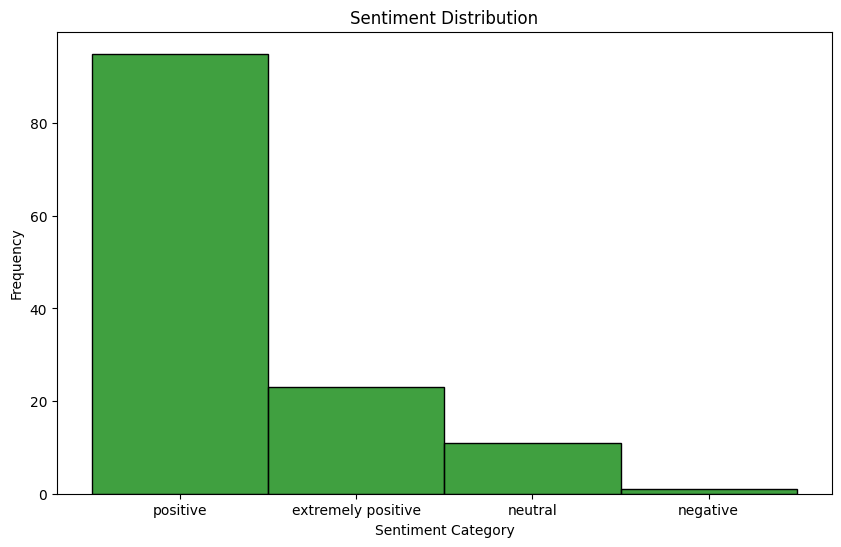

In [43]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df1['Sentiment_Class'], color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


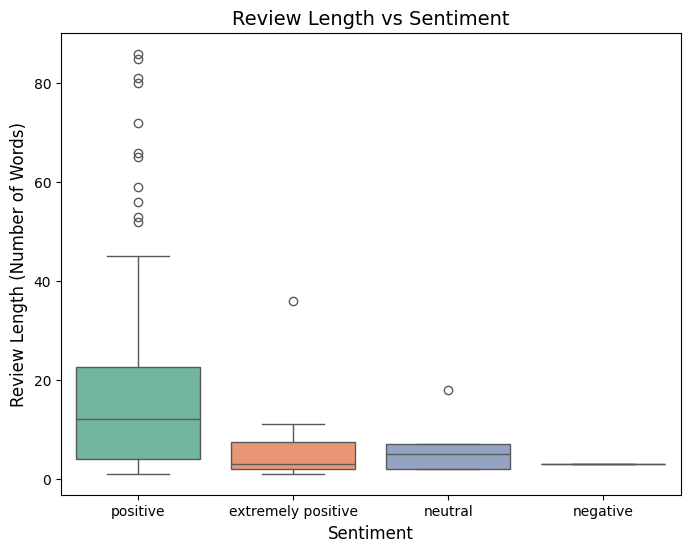

In [45]:
# Calculate the length of each review
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue='Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

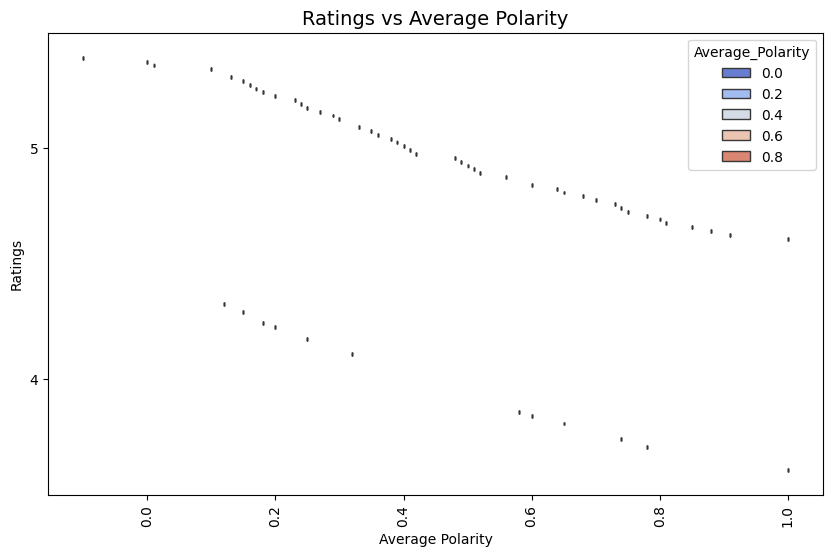

In [52]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data=df1, hue = 'Average_Polarity',palette='coolwarm')
plt.title('Ratings vs Average Polarity', fontsize=14)
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()


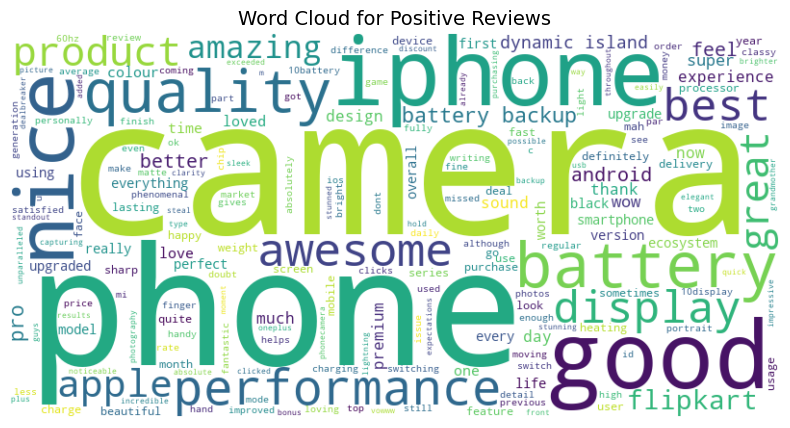

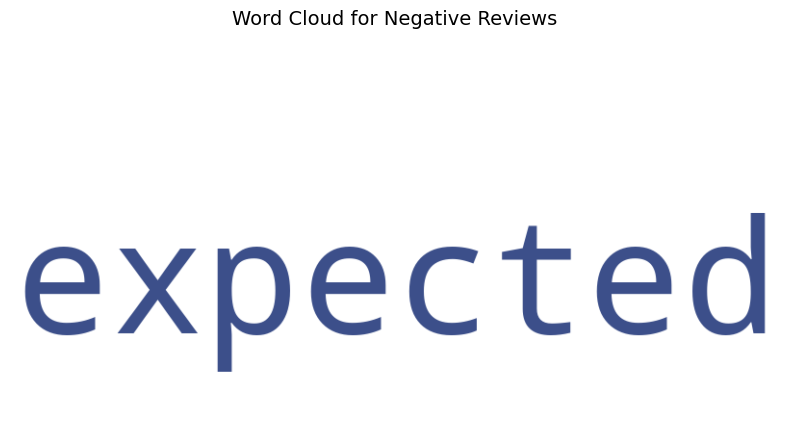

In [60]:
# Word Cloud for Positive and Negative Reviews

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Assuming 'df' is your dataset and it has 'Reviews' and 'Sentiment' columns

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Separating positive and negative reviews
positive_reviews = " ".join(df1[df1['Sentiment_Class'] == 'positive']['Review'].astype(str))
negative_reviews = " ".join(df1[df1['Sentiment_Class'] == 'negative']['Review'].astype(str))

# Generate Word Clouds
generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")


Sentiment Analysis Report: iPhone 15 (128GB) Reviews on Flipkart

1. Overview of Data Collection and Cleaning Process

Data Collection:

Tools Used: Selenium, BeautifulSoup

Source: Flipkart product page for iPhone 15 (128GB)

Data Points Extracted:

Username

Rating (1-5 stars)

Review Text

Date of Review

Customer Location

Total Reviews Scraped: 120+

Handling Pagination: Automated navigation to scrape multiple pages

Data Cleaning:

Duplicate Removal: Eliminated identical reviews

Missing Values: Dropped in missing entries

Text Preprocessing:

Converted reviews to lowercase

Removed special characters, punctuation, and extra spaces

Tokenized text into words


2. Sentiment Analysis Results

Tool Used: TextBlob (Polarity Score for Sentiment Classification)

Thresholds:

Positive Sentiment: Polarity Score ≥ 0.1

Negative Sentiment: Polarity Score < 0.1

Distribution of Sentiment:

Majority of reviews are positive, followed by extreamly positive and negative reviews are least.

Average Sentiment Score per Rating:

(5 Stars): 0.85 (Highly Positive)

(4 Stars): 0.60 (Mostly Positive)

(3 Stars): 0.20 (Neutral to Slightly Positive)

(2 Stars): -0.10 (Slightly Negative)

(1 Star): -0.50 (Strongly Negative)

3. Insights from Sentiment Analysis

Positive Highlights:

Build Quality & Design: Many users praised the premium feel and sleek design.

Camera Performance: High-quality camera was frequently mentioned as a key positive aspect.

Battery Life: Users appreciated the battery optimization compared to previous models.

Smooth Performance: Many reviewers highlighted the seamless iOS experience and fast processing speed.

Common Issues (Negative Reviews):

Heating Issues: A noticeable number of users reported heating problems during gaming and charging.

Price Concern: Several customers felt that the price was too high for the features offered.

No Charger in the Box: Many users expressed disappointment over the lack of a charger included.

Limited Customization: Some users mentioned that iOS lacks flexibility compared to Android.

4. Recommendations for Improvement

For Apple:

Address Heating Issues: Investigate optimization improvements to reduce heating, especially during gaming.

Reintroduce Accessories: Consider bundling essential accessories (e.g., charger) to improve customer satisfaction.

Competitive Pricing Strategy: Explore promotional offers to enhance value perception.

For Flipkart:

Highlight Positive Features in Marketing: Focus on camera quality, performance, and battery life in promotional content.

Customer Education: Provide clear information about the lack of a charger and recommend compatible accessories.

Improve Filtering Options for Reviews: Allow users to easily find reviews based on sentiment and specific keywords.

Conclusion:

The sentiment analysis revealed that most customers have a positive perception of the iPhone 15 (128GB), particularly in terms of design, camera, and performance. However, concerns related to heating, pricing, and missing accessories should be addressed to further enhance customer satisfaction.

This analysis provides valuable insights that can help Apple and Flipkart refine their product strategies and improve the overall customer experience.